# Test1: SINDy(PDE)

### modified by Aaron X, 12/2/20

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import time
import cv2

In [5]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from pySINDy.sindypde import SINDyPDE
from pySINDy import SINDy
from pySINDy.sindybase import SINDyBase
from pySINDy.sindylibr import SINDyLibr

ModuleNotFoundError: No module named 'scipy'

In [3]:
###---NOT TESTED---###
'''
def loadUV():
    
    data = np.zeros((2*841,641), dtype=float)
    u = np.zeros((841,641), dtype=float)
    v = np.zeros((841,641), dtype=float)
    #filename = "datasets/uvdata.bin"
    fd = open(filename,'rb')
    position = 0
    no_of_doubles = 1000
    # move to position in file
    fd.seek(position,0)
    # straight to numpy data (no buffering)
    data = np.fromfile(fd, dtype = np.dtype('float32'), count = 2*841*641)
    data = np.reshape(data,(2*841,641))
    data = data.astype('float32')
    #print(np.dtype(data))

    u = data[0:841,1,641]
    v = data[841:,1,641]
    #x=[1:1:841];
    x = np.arange(0, 841, 10).tolist()
    #y=[1:1:561];
    y = np.arange(0, 641, 10).tolist()
    #t=[0:10:180]; 
    t = np.arange(0, 180, 10).tolist()
    dt = t[1] - t[0]
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    
    return u, v
'''

'\ndef loadUV():\n    \n    data = np.zeros((2*841,641), dtype=float)\n    u = np.zeros((841,641), dtype=float)\n    v = np.zeros((841,641), dtype=float)\n    #filename = "datasets/uvdata.bin"\n    fd = open(filename,\'rb\')\n    position = 0\n    no_of_doubles = 1000\n    # move to position in file\n    fd.seek(position,0)\n    # straight to numpy data (no buffering)\n    data = np.fromfile(fd, dtype = np.dtype(\'float32\'), count = 2*841*641)\n    data = np.reshape(data,(2*841,641))\n    data = data.astype(\'float32\')\n    #print(np.dtype(data))\n\n    u = data[0:841,1,641]\n    v = data[841:,1,641]\n    #x=[1:1:841];\n    x = np.arange(0, 841, 10).tolist()\n    #y=[1:1:561];\n    y = np.arange(0, 641, 10).tolist()\n    #t=[0:10:180]; \n    t = np.arange(0, 180, 10).tolist()\n    dt = t[1] - t[0]\n    dx = x[1] - x[0]\n    dy = y[1] - y[0]\n    \n    return u, v\n'

In [4]:

'''
fnames=["uv1.bin","uv2.bin","uv3.bin","uv4.bin","uv5.bin","uv6.bin","uv7.bin","uv8.bin","uv9.bin","uv10bin",]

s=(841,641)
U_s=np.zeros(s)
V_s=np.zeros(s)

for i in range(10):
    u, v = loadUV(fnames[i-1])
    
'''  

'\nfnames=["uv1.bin","uv2.bin","uv3.bin","uv4.bin","uv5.bin","uv6.bin","uv7.bin","uv8.bin","uv9.bin","uv10bin",]\n\ns=(841,641)\nU_s=np.zeros(s)\nV_s=np.zeros(s)\n\nfor i in range(10):\n    u, v = loadUV(fnames[i-1])\n    \n'

In [3]:
# this .mat file can be generated from two of our .m files in datasets directory,
# but since it's too large, we'll leave the user to generate the .mat file by themselves
traindata = sio.loadmat('../datasets/20190726-UV.mat')
traindata.keys()

NameError: name 'sio' is not defined

In [6]:
U = np.real(traindata['u'])
V = np.real(traindata['v'])
t = np.real(traindata['t'].flatten())
x = np.real(traindata['x'].flatten())
y = np.real(traindata['y'].flatten())
dt = t[1] - t[0]
dx = x[1] - x[0]
dy = y[1] - y[0]

print(np.shape(U))
print(np.shape(V))
print(np.shape(x))
print(np.shape(y))
print(np.shape(t))

(841, 561, 10)
(841, 561, 10)
(841,)
(561,)
(10,)


In [7]:
model = SINDyPDE(name='SINDyPDE model for Reaction-Diffusion Eqn')
model2 = SINDyLibr(name='Derived module from sindybase.py for libr computation')

In [8]:

start_time=time.time()
#model.fit(self, data, poly_degree=2, cut_off=1e-3)
model.fit({'u': U, 'v': V}, dt, [dx, dy], space_deriv_order=2, poly_degree=2, sample_rate=0.01, cut_off=0.05, deriv_acc=2)

print("\n--- Train time %s seconds ---\n" %(time.time() - start_time))

Progress: finished computing time derivatives  ...
Progress: finished computing spatial derivatives  ...
Progress: finished sparse regression  ...
Dict: (4718010, 66)

--- Train time 19.777135133743286 seconds ---



In [9]:
print("\n--- Active terms ---\n" )
size=np.shape(model.coefficients)
cnt=0
for i in range(size[0]):
    for j in range(size[1]):
        if (model.coefficients[i,j])!=0:
            #print(model.coefficients[i,j],"--",model.descriptions[i])
            cnt+=1
print("Count",cnt)



--- Active terms ---

Count 53


In [10]:
# this .mat file can be generated from two of our .m files in datasets directory,
# but since it's too large, we'll leave the user to generate the .mat file by themselves
testdata = sio.loadmat('../datasets/20190726/20190726-UVTest.mat')
testdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 't', 'x', 'y', 'u', 'v'])

In [11]:
Us = np.real(testdata['u']).reshape(841,561,1)
Vs = np.real(testdata['v']).reshape(841,561,1)
ts = np.real(testdata['t'].flatten())
xs = np.real(testdata['x'].flatten())
ys = np.real(testdata['y'].flatten())
dts = t[1] - t[0]
dxs = x[1] - x[0]
dys = y[1] - y[0]

print(np.shape(Us))
print(np.shape(Vs))
print(np.shape(ts))
print(np.shape(xs))
print(np.shape(ys))


(841, 561, 1)
(841, 561, 1)
(2,)
(841,)
(561,)


In [12]:
libx=model2.libr({'u': Us, 'v': Vs}, dts, [dxs,dys], space_deriv_order=2, poly_degree=2, sample_rate=0.01, cut_off=0.5, deriv_acc=2)

Dict: (471801, 66)


In [13]:
np.shape(libx)

(471801, 66)

In [14]:
coeff=model.coefficients
np.shape(coeff)

(66, 2)

In [15]:
duv_dt=np.matmul(libx,coeff)
du_dt=duv_dt[:,0]
dv_dt=duv_dt[:,1]

In [16]:
delta_u=np.reshape(du_dt,[841,561])
delta_v=np.reshape(dv_dt,[841,561])

U_nxt=np.reshape(Us,[841,561])+delta_u
V_nxt=np.reshape(Vs,[841,561])+delta_v

In [17]:
##--SAMPLING--##
s=(84,56)
U_ds=np.zeros(s)
V_ds=np.zeros(s)
d_u=np.zeros(s)
d_v=np.zeros(s)
for i in range(1,84):
    for j in range(1,56):
        U_ds[i,j]=U_nxt[10*i,10*j]
        V_ds[i,j]=V_nxt[10*i,10*j]
        d_u[i,j]=delta_u[10*i,10*j]
        d_v[i,j]=delta_v[10*i,10*j]
        

fig, ax = plt.subplots(figsize=(56,84))

x_pos = np.arange(0,56,1)
y_pos = np.arange(0,84,1)


ax.quiver(x_pos,y_pos, U_ds[:,:], V_ds[:,:], width=0.001)
ax.set_title('Plotting motion vectors')

#plt.show()

Text(0.5, 1.0, 'Plotting motion vectors')

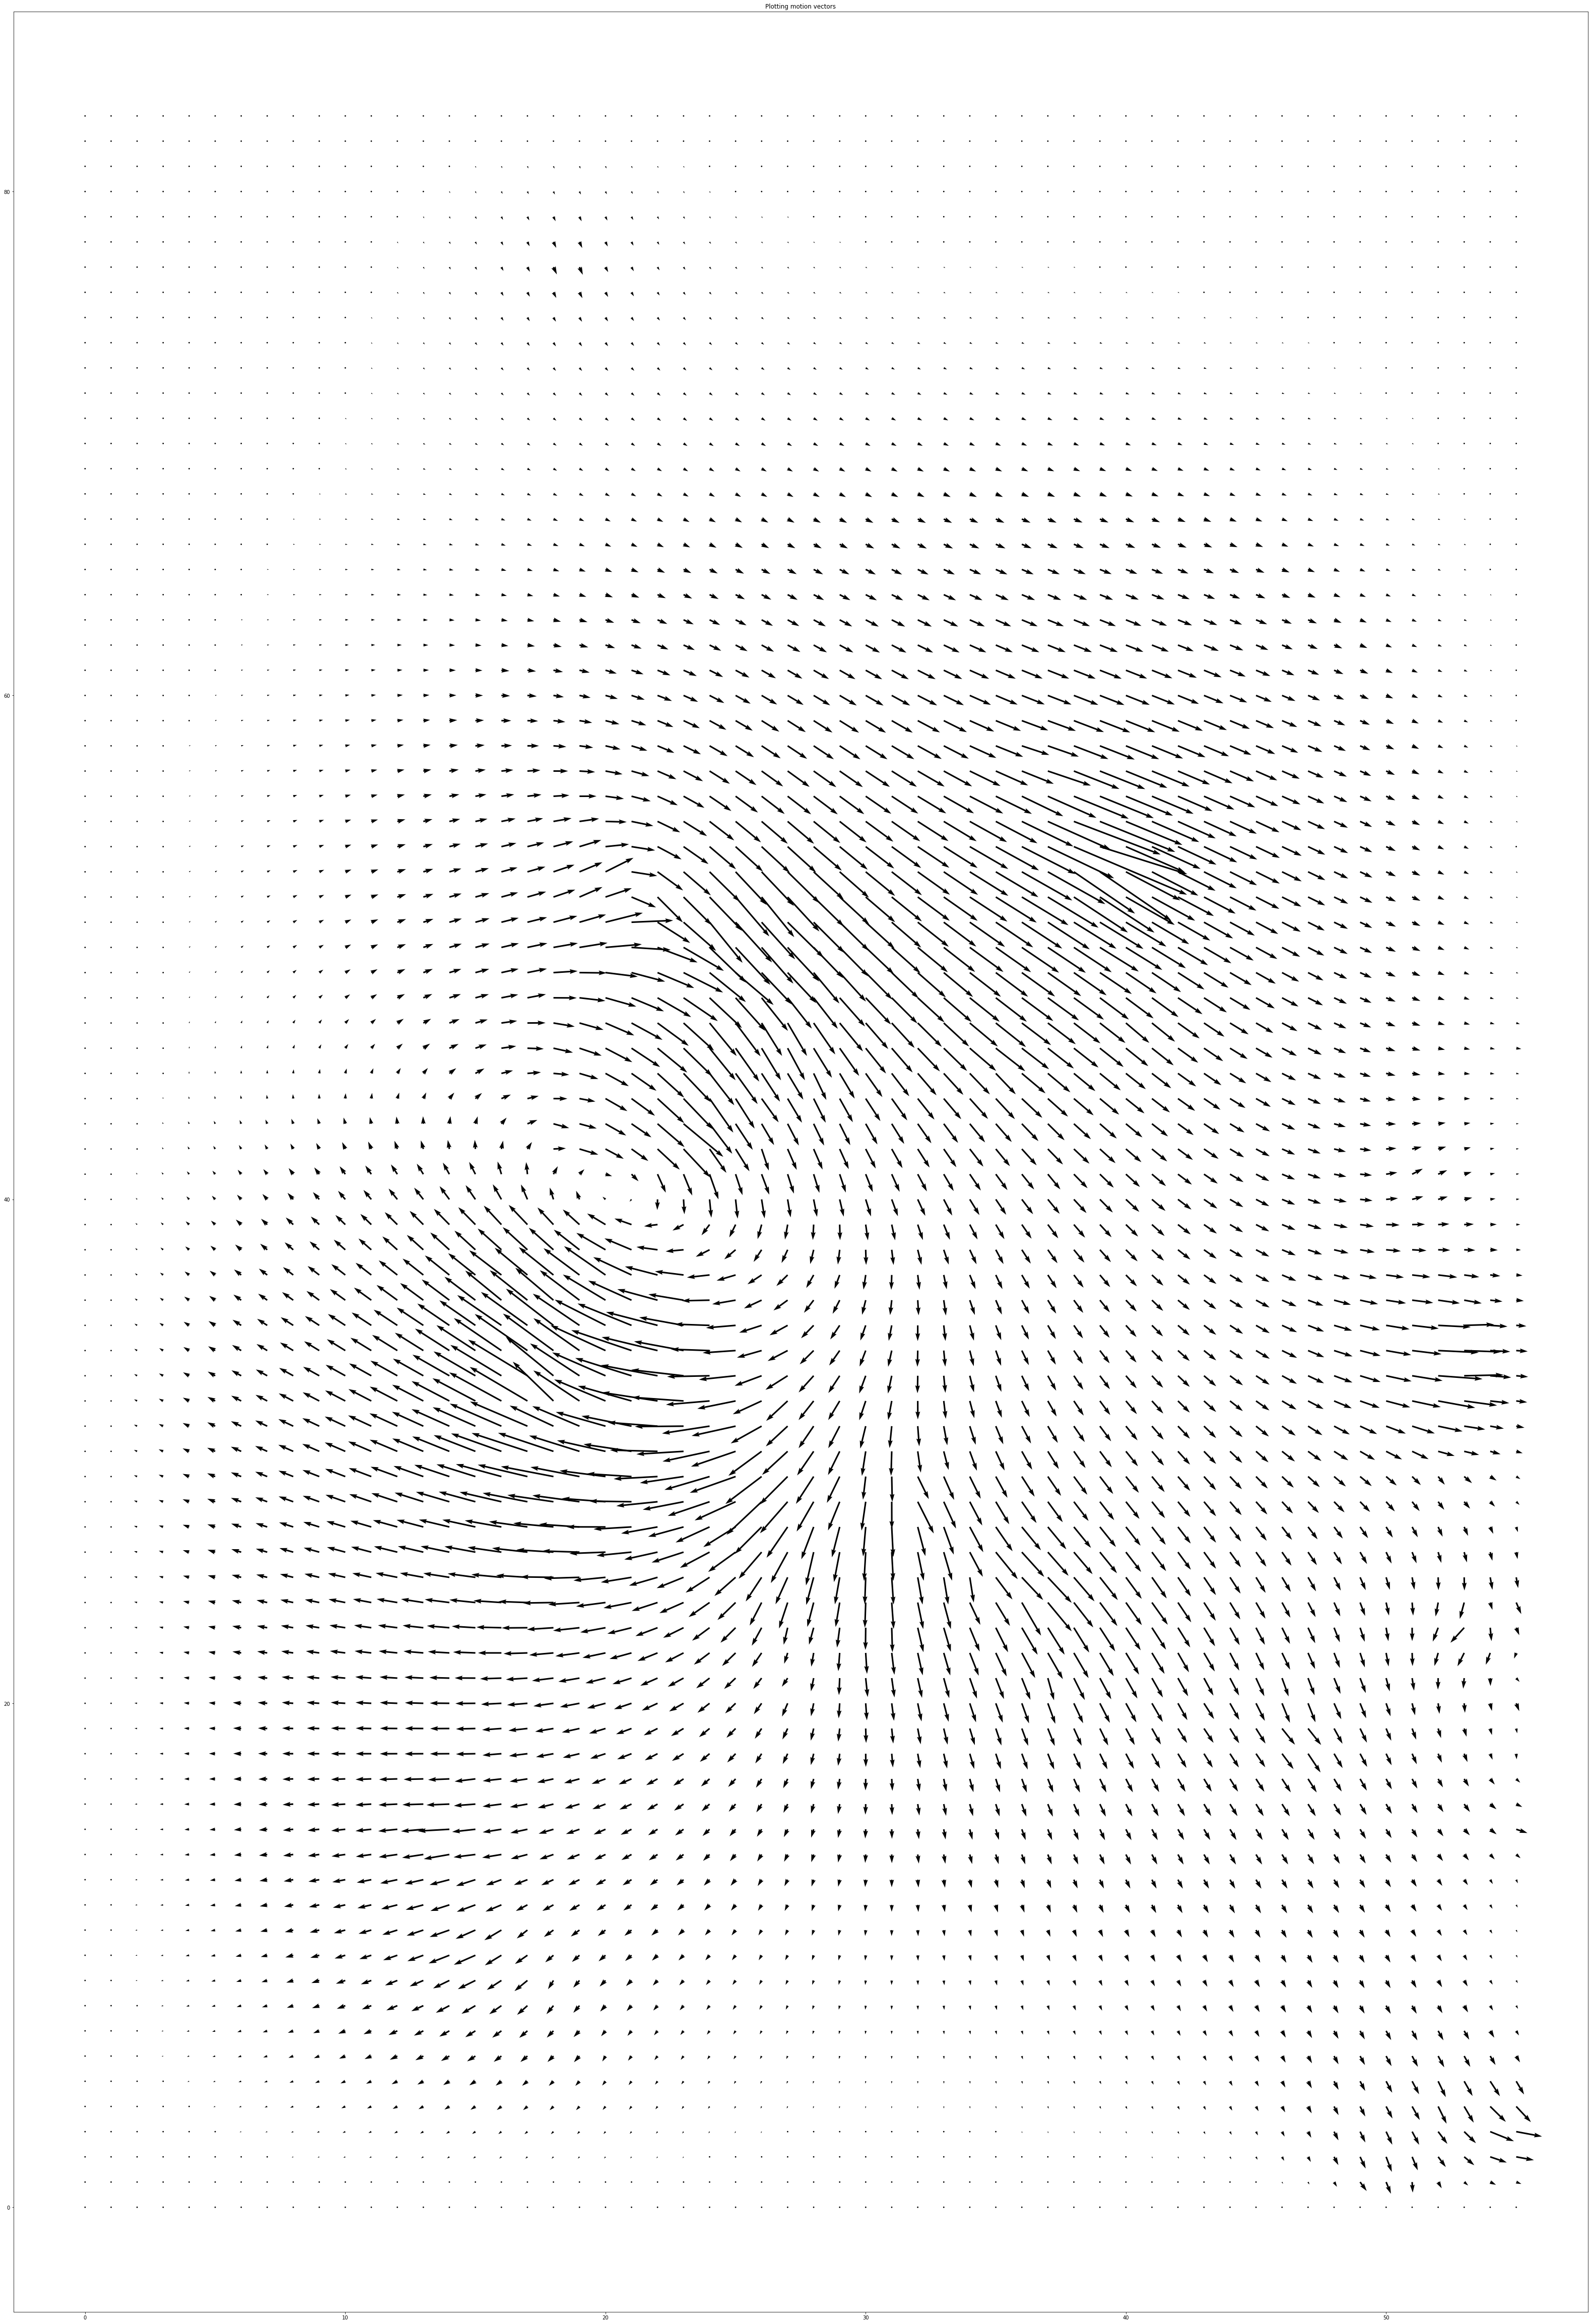

In [18]:
fig, ax = plt.subplots(figsize=(56,84))

x_pos = np.arange(0,56)
y_pos = np.arange(0,84)


ax.quiver(x_pos,y_pos, U_ds[:,:], V_ds[:,:], width=0.001)
ax.set_title('Plotting motion vectors')

#plt.show()

In [19]:
#for i in range(0,10):
    #U_ds+=10*d_u
    #V_ds+=10*d_v
    #fig, ax = plt.subplots(figsize=(56,84))

    #x_pos = np.arange(0,56,1) 
    #y_pos = np.arange(0,84,1)
    #ax.quiver(x_pos,y_pos, U_ds[:,:], V_ds[:,:], width=0.0005)
    #ax.set_title('Plotting motion vectors')
    #filename="Outputs/Im%i.png"%+(int(i)+1)
    #plt.savefig(filename)
    